**Validação das Sequências Preditas**

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob

In [2]:
#Dados
os.chdir("C:/Users/User/Desktop/MarkV/")

In [3]:
dfs = []

for planilha in glob.glob("data/Predictions/*.csv"):
    df = pd.read_csv(planilha)
    dfs.append(df)

df_final = pd.concat(dfs, ignore_index=True)

# Verificar
print(f"Total de linhas combinadas: {df_final.shape[0]}")
print(df_final.head())

Total de linhas combinadas: 149
  Sample                              Node              XGB              RF
0   NF10  NODE_18_length_2064_cov_2.646200   Sedoreoviridae  Sedoreoviridae
1   NF10  NODE_54_length_1472_cov_2.822222     Astroviridae  Hepadnaviridae
2   NF10  NODE_224_length_960_cov_8.497589  Spinareoviridae  Sedoreoviridae
3   NF10  NODE_430_length_750_cov_5.506686   Sedoreoviridae  Sedoreoviridae
4   NF10  NODE_512_length_707_cov_1.630159   Sedoreoviridae   Matonaviridae


In [4]:
df_final['Sample_num'] = df_final['Sample'].str.extract(r'NF(\d+)').astype(int)
df_final = df_final.sort_values(by='Sample_num').drop(columns='Sample_num')
df_final.head()

,Sample,Node,XGB,RF
108,NF1,NODE_273_length_573_cov_0.887097,Sedoreoviridae,Sedoreoviridae
111,NF1,NODE_383_length_518_cov_1.498866,Sedoreoviridae,Anelloviridae
110,NF1,NODE_342_length_534_cov_7033.369803,Sedoreoviridae,Anelloviridae
109,NF1,NODE_286_length_569_cov_1.247967,Anelloviridae,Anelloviridae
107,NF1,NODE_260_length_581_cov_13221.982143,Sedoreoviridae,Anelloviridae


In [5]:
df_prob = pd.read_csv("Probs.csv")
df_prob.head()

,Unnamed: 0,Sample,Node,XGB,RF,cov,RF_Adenoviridae,RF_Anelloviridae,RF_Arenaviridae,RF_Astroviridae,...,XGB_Picornaviridae,XGB_Pneumoviridae,XGB_Polyomaviridae,XGB_Poxviridae,XGB_Redondoviridae,XGB_Retroviridae,XGB_Rhabdoviridae,XGB_Sedoreoviridae,XGB_Spinareoviridae,XGB_Togaviridae
0,0,NF1,NODE_273_length_573_cov_0.887097,Sedoreoviridae,Sedoreoviridae,0.887097,0.00,0.05,0.00,0.02,...,0.000080,0.000075,0.000063,0.000071,0.000328,0.010646,0.000078,0.956085,0.019831,0.000076
1,1,NF1,NODE_383_length_518_cov_1.498866,Sedoreoviridae,Anelloviridae,1.498866,0.01,0.09,0.02,0.00,...,0.003881,0.003967,0.003325,0.003719,0.013897,0.116779,0.012670,0.361893,0.039030,0.004014
2,2,NF1,NODE_342_length_534_cov_7033.369803,Sedoreoviridae,Anelloviridae,7033.369803,0.00,0.40,0.03,0.00,...,0.003836,0.004610,0.003009,0.003365,0.002933,0.018510,0.003709,0.579240,0.046054,0.003632
3,3,NF1,NODE_286_length_569_cov_1.247967,Anelloviridae,Anelloviridae,1.247967,0.01,0.20,0.01,0.02,...,0.005489,0.004812,0.004702,0.005260,0.009841,0.016296,0.035401,0.045269,0.015472,0.004383
4,4,NF1,NODE_260_length_581_cov_13221.982143,Sedoreoviridae,Anelloviridae,13221.982143,0.00,0.17,0.03,0.02,...,0.000497,0.000498,0.000426,0.000476,0.001533,0.001123,0.002317,0.886530,0.037657,0.000446


In [6]:
complicada = df_prob[(df_prob["RF"] == "Anelloviridae") & (df_prob["RF_Anelloviridae"] <= 0.16)]
complicada[["Sample","Node", "RF", "XGB", "RF_Anelloviridae", "XGB_Anelloviridae"]]

,Sample,Node,RF,XGB,RF_Anelloviridae,XGB_Anelloviridae
1,NF1,NODE_383_length_518_cov_1.498866,Anelloviridae,Sedoreoviridae,0.09,0.026442
5,NF1,NODE_245_length_589_cov_1818.878906,Anelloviridae,Pneumoviridae,0.16,0.027912
24,NF7,NODE_258_length_560_cov_2.364389,Anelloviridae,Sedoreoviridae,0.14,0.012153
35,NF8,NODE_985_length_769_cov_19.553468,Anelloviridae,Phenuiviridae,0.16,0.094063
42,NF8,NODE_592_length_936_cov_1.880093,Anelloviridae,Spinareoviridae,0.12,0.076013
68,NF13,NODE_76_length_602_cov_88.093333,Anelloviridae,Orthoherpesviridae,0.16,0.159215
130,NF16,NODE_2162_length_503_cov_2.053991,Anelloviridae,Orthoherpesviridae,0.14,0.078361
135,NF16,NODE_1237_length_684_cov_5.481054,Anelloviridae,Spinareoviridae,0.14,0.038188


In [36]:
anellovirus = df_prob[(df_prob["RF"] == "Anelloviridae") & (df_prob["XGB"] != "Anelloviridae")]
anellovirus.shape

(15, 74)

In [37]:
anellovirus[["Sample","Node", "RF", "XGB", "RF_Anelloviridae", "XGB_Anelloviridae"]]

,Sample,Node,RF,XGB,RF_Anelloviridae,XGB_Anelloviridae
1,NF1,NODE_383_length_518_cov_1.498866,Anelloviridae,Sedoreoviridae,0.09,0.026442
2,NF1,NODE_342_length_534_cov_7033.369803,Anelloviridae,Sedoreoviridae,0.40,0.080879
4,NF1,NODE_260_length_581_cov_13221.982143,Anelloviridae,Sedoreoviridae,0.17,0.024394
5,NF1,NODE_245_length_589_cov_1818.878906,Anelloviridae,Pneumoviridae,0.16,0.027912
8,NF1,NODE_2_length_2432_cov_37659.103185,Anelloviridae,Sedoreoviridae,0.77,0.199839
24,NF7,NODE_258_length_560_cov_2.364389,Anelloviridae,Sedoreoviridae,0.14,0.012153
35,NF8,NODE_985_length_769_cov_19.553468,Anelloviridae,Phenuiviridae,0.16,0.094063
42,NF8,NODE_592_length_936_cov_1.880093,Anelloviridae,Spinareoviridae,0.12,0.076013
65,NF13,NODE_50_length_883_cov_615.369727,Anelloviridae,Phenuiviridae,0.32,0.210059
66,NF13,NODE_90_length_539_cov_7.887446,Anelloviridae,Retroviridae,0.63,0.071577


In [39]:
ids = list(anellovirus["Node"])

In [27]:
NF13 = pd.read_csv("data/NF13_DarkMatter.csv")

In [48]:
anellovirus[anellovirus["Node"] == "NODE_2_length_3154_cov_51150.890153"] 

,Unnamed: 0,Sample,Node,XGB,RF,cov,RF_Adenoviridae,RF_Anelloviridae,RF_Arenaviridae,RF_Astroviridae,...,XGB_Picornaviridae,XGB_Pneumoviridae,XGB_Polyomaviridae,XGB_Poxviridae,XGB_Redondoviridae,XGB_Retroviridae,XGB_Rhabdoviridae,XGB_Sedoreoviridae,XGB_Spinareoviridae,XGB_Togaviridae
87,87,NF13,NODE_2_length_3154_cov_51150.890153,Anelloviridae,Anelloviridae,51150.890153,0.01,0.55,0.01,0.01,...,0.010376,0.008078,0.00889,0.009944,0.006204,0.01388,0.00967,0.007127,0.007743,0.009327


In [61]:
nf13_filtrado = NF13[NF13["Node"].isin(anellovirus["Node"])]

nf13_perfis = nf13_filtrado.iloc[:, 259:]

nf13_perfis = nf13_perfis.apply(pd.to_numeric, errors="coerce")

mask = nf13_perfis.gt(1).any(axis=1)
nf13_perfis_filtrado = nf13_filtrado.loc[mask, ["Node"]].join(nf13_perfis)

print(nf13_perfis_filtrado.shape)
print(nf13_perfis_filtrado)

(28, 26)
                                   Node  Query_ID  AAA_24  AF-4  \
0   NODE_2_length_3154_cov_51150.890153       NaN     0.0   0.0   
1    NODE_3_length_3072_cov_4598.808347       NaN     0.0   0.0   
2    NODE_4_length_3018_cov_2068.524311       NaN     0.0   0.0   
3    NODE_5_length_2995_cov_1530.254626       NaN     0.0   0.0   
4     NODE_6_length_2946_cov_776.696758       NaN     0.0   0.0   
5      NODE_7_length_2888_cov_28.270011       NaN     0.0   0.0   
6      NODE_8_length_2876_cov_28.005002       NaN     0.0   0.0   
7     NODE_9_length_2871_cov_452.173944       NaN     0.0   0.0   
8    NODE_10_length_2868_cov_318.776424       NaN     0.0   0.0   
9     NODE_12_length_2700_cov_56.296988       NaN     0.0   0.0   
10    NODE_13_length_2663_cov_37.269142       NaN     0.0   0.0   
11    NODE_14_length_2641_cov_14.736739       NaN     0.0   0.0   
12    NODE_16_length_2608_cov_34.666535       NaN     0.0   0.0   
13     NODE_18_length_2504_cov_9.668727       NaN    

In [63]:
perfis_interesse = ["TT_ORF1", "TT_ORF2", "TT_ORF2a", "DUF755"]

nf13_filtrado = NF13[NF13["Node"].isin(anellovirus["Node"])]
nf13_perfis = nf13_filtrado[["Node"] + perfis_interesse]

# filtrar valores > 1
nf13_perfis_filtrado = nf13_perfis.loc[nf13_perfis[perfis_interesse].gt(1).any(axis=1)]
nf13_perfis_filtrado

,Node,TT_ORF1,TT_ORF2,TT_ORF2a,DUF755
0,NODE_2_length_3154_cov_51150.890153,0.0,0.0,0.0,70.5
1,NODE_3_length_3072_cov_4598.808347,0.0,76.0,38.6,57.5
2,NODE_4_length_3018_cov_2068.524311,0.0,51.0,49.2,54.6
3,NODE_5_length_2995_cov_1530.254626,0.0,86.5,48.4,63.2
4,NODE_6_length_2946_cov_776.696758,0.0,51.9,0.0,75.5
5,NODE_7_length_2888_cov_28.270011,0.0,110.4,0.0,55.2
6,NODE_8_length_2876_cov_28.005002,643.7,0.0,0.0,0.0
7,NODE_9_length_2871_cov_452.173944,0.0,72.1,0.0,62.8
8,NODE_10_length_2868_cov_318.776424,685.1,0.0,0.0,0.0
9,NODE_12_length_2700_cov_56.296988,0.0,41.1,0.0,42.4


In [5]:
perfis = pd.read_csv("results/todos_anellovirus_perfis.tsv", sep = "\t")

In [10]:
perfis["DUF755"].max()
perfis[perfis["DUF755"] > 0]

,Node,TT_ORF1,TT_ORF2,TT_ORF2a,DUF755,Sample
1,NODE_54_length_2708_cov_304.278601,0.0,43.5,0.0,113.2,NF16
2,NODE_2_length_3154_cov_51150.890153,0.0,0.0,0.0,70.5,NF13
3,NODE_3_length_3072_cov_4598.808347,0.0,76.0,38.6,57.5,NF13
4,NODE_4_length_3018_cov_2068.524311,0.0,51.0,49.2,54.6,NF13
5,NODE_5_length_2995_cov_1530.254626,0.0,86.5,48.4,63.2,NF13
6,NODE_6_length_2946_cov_776.696758,0.0,51.9,0.0,75.5,NF13
7,NODE_7_length_2888_cov_28.270011,0.0,110.4,0.0,55.2,NF13
9,NODE_9_length_2871_cov_452.173944,0.0,72.1,0.0,62.8,NF13
11,NODE_12_length_2700_cov_56.296988,0.0,41.1,0.0,42.4,NF13
14,NODE_16_length_2608_cov_34.666535,0.0,36.1,0.0,49.7,NF13


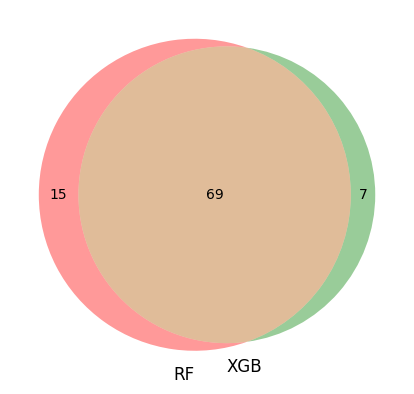

<Figure size 1600x800 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (15, 7, 69), set_labels = ('RF', 'XGB'))
plt.figure(figsize =(16,8))
#plt.title("Anelloviridae prdictions", style = "italic")
plt.show()